# Exp 25 analysis

See `./informercial/Makefile` for experimental
details.

In [1]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from infomercial.exp import beta_bandit
from infomercial.local_gym import bandit
from infomercial.exp.meta_bandit import load_checkpoint

import gym

In [2]:
# ls ../data/exp2*

# Load and process data

In [3]:
data_path ="/Users/qualia/Code/infomercial/data/"
exp_name = "exp25"
best_params = load_checkpoint(os.path.join(data_path, f"{exp_name}_best.pkl"))
sorted_params = load_checkpoint(os.path.join(data_path, f"{exp_name}_sorted.pkl"))

In [4]:
best_params

{'beta': 0.0527058882879015, 'lr': 0.13880694416354472, 'total_R': 1861.0}

# Performance

of best parameters

In [5]:
env_name = 'BanditOneHigh1000-v0'

# Run w/ best params
result = beta_bandit(
    env_name=env_name,
    num_episodes=3000, 
    lr=best_params["lr"], 
    beta=best_params["beta"],
    seed_value=19,
    save="exp25_best_model.pkl"
)

/Users/qualia/anaconda3/envs/py3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Best arm: 526, last arm: 773


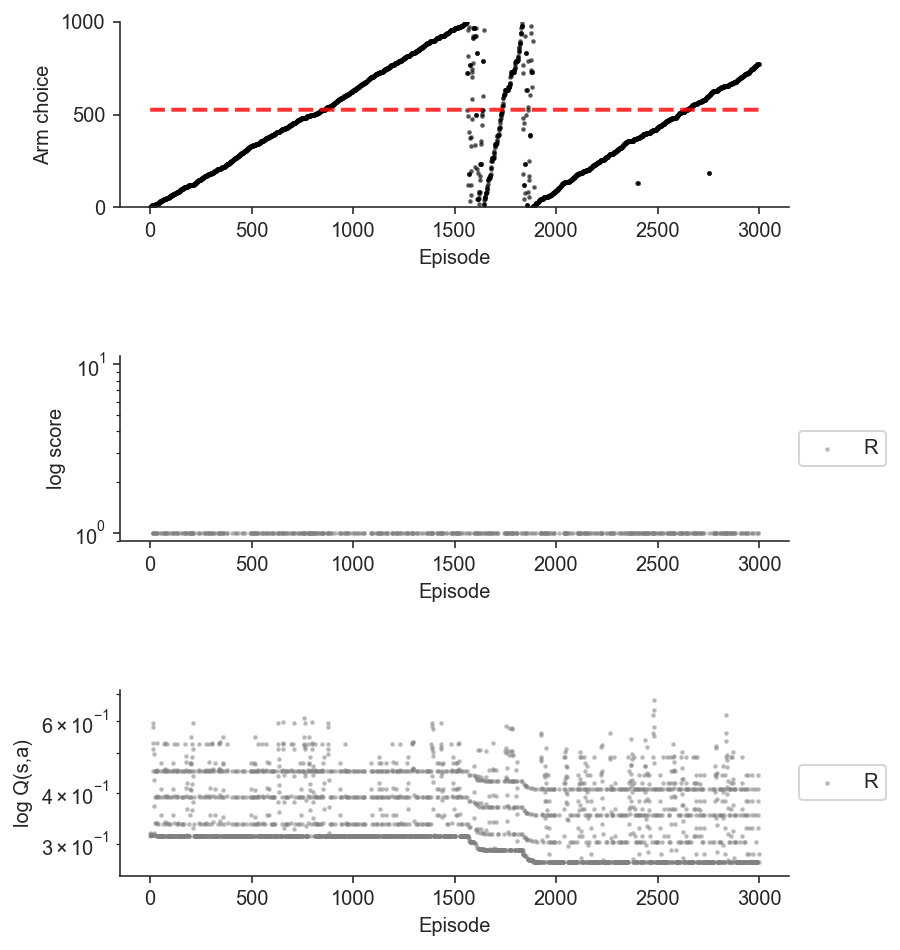

In [6]:
# Plot run
episodes = result["episodes"]
actions =result["actions"]
scores_R = result["scores_R"]
values_R = result["values_R"]

# Get some data from the gym...
env = gym.make(env_name)
best = env.best
print(f"Best arm: {best}, last arm: {actions[-1]}")

# Init plot
fig = plt.figure(figsize=(6, 14))
grid = plt.GridSpec(5, 1, wspace=0.3, hspace=0.8)

# Do plots:
# Arm
plt.subplot(grid[0, 0])
plt.scatter(episodes, actions, color="black", alpha=.5, s=2, label="Bandit")
plt.plot(episodes, np.repeat(best, np.max(episodes)+1), 
         color="red", alpha=0.8, ls='--', linewidth=2)
plt.ylim(-.1, np.max(actions)+1.1)
plt.ylabel("Arm choice")
plt.xlabel("Episode")

# score
plt.subplot(grid[1, 0])
plt.scatter(episodes, scores_R, color="grey", alpha=0.4, s=2, label="R")
plt.ylabel("log score")
plt.xlabel("Episode")
plt.semilogy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()

# Q
plt.subplot(grid[2, 0])
plt.scatter(episodes, values_R, color="grey", alpha=0.4, s=2, label="R")
plt.ylabel("log Q(s,a)")
plt.xlabel("Episode")
plt.semilogy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()

# -
plt.savefig("figures/epsilon_bandit.pdf",  bbox_inches='tight')
plt.savefig("figures/epsilon_bandit.eps",  bbox_inches='tight')

# Sensitivity

to parameter choices

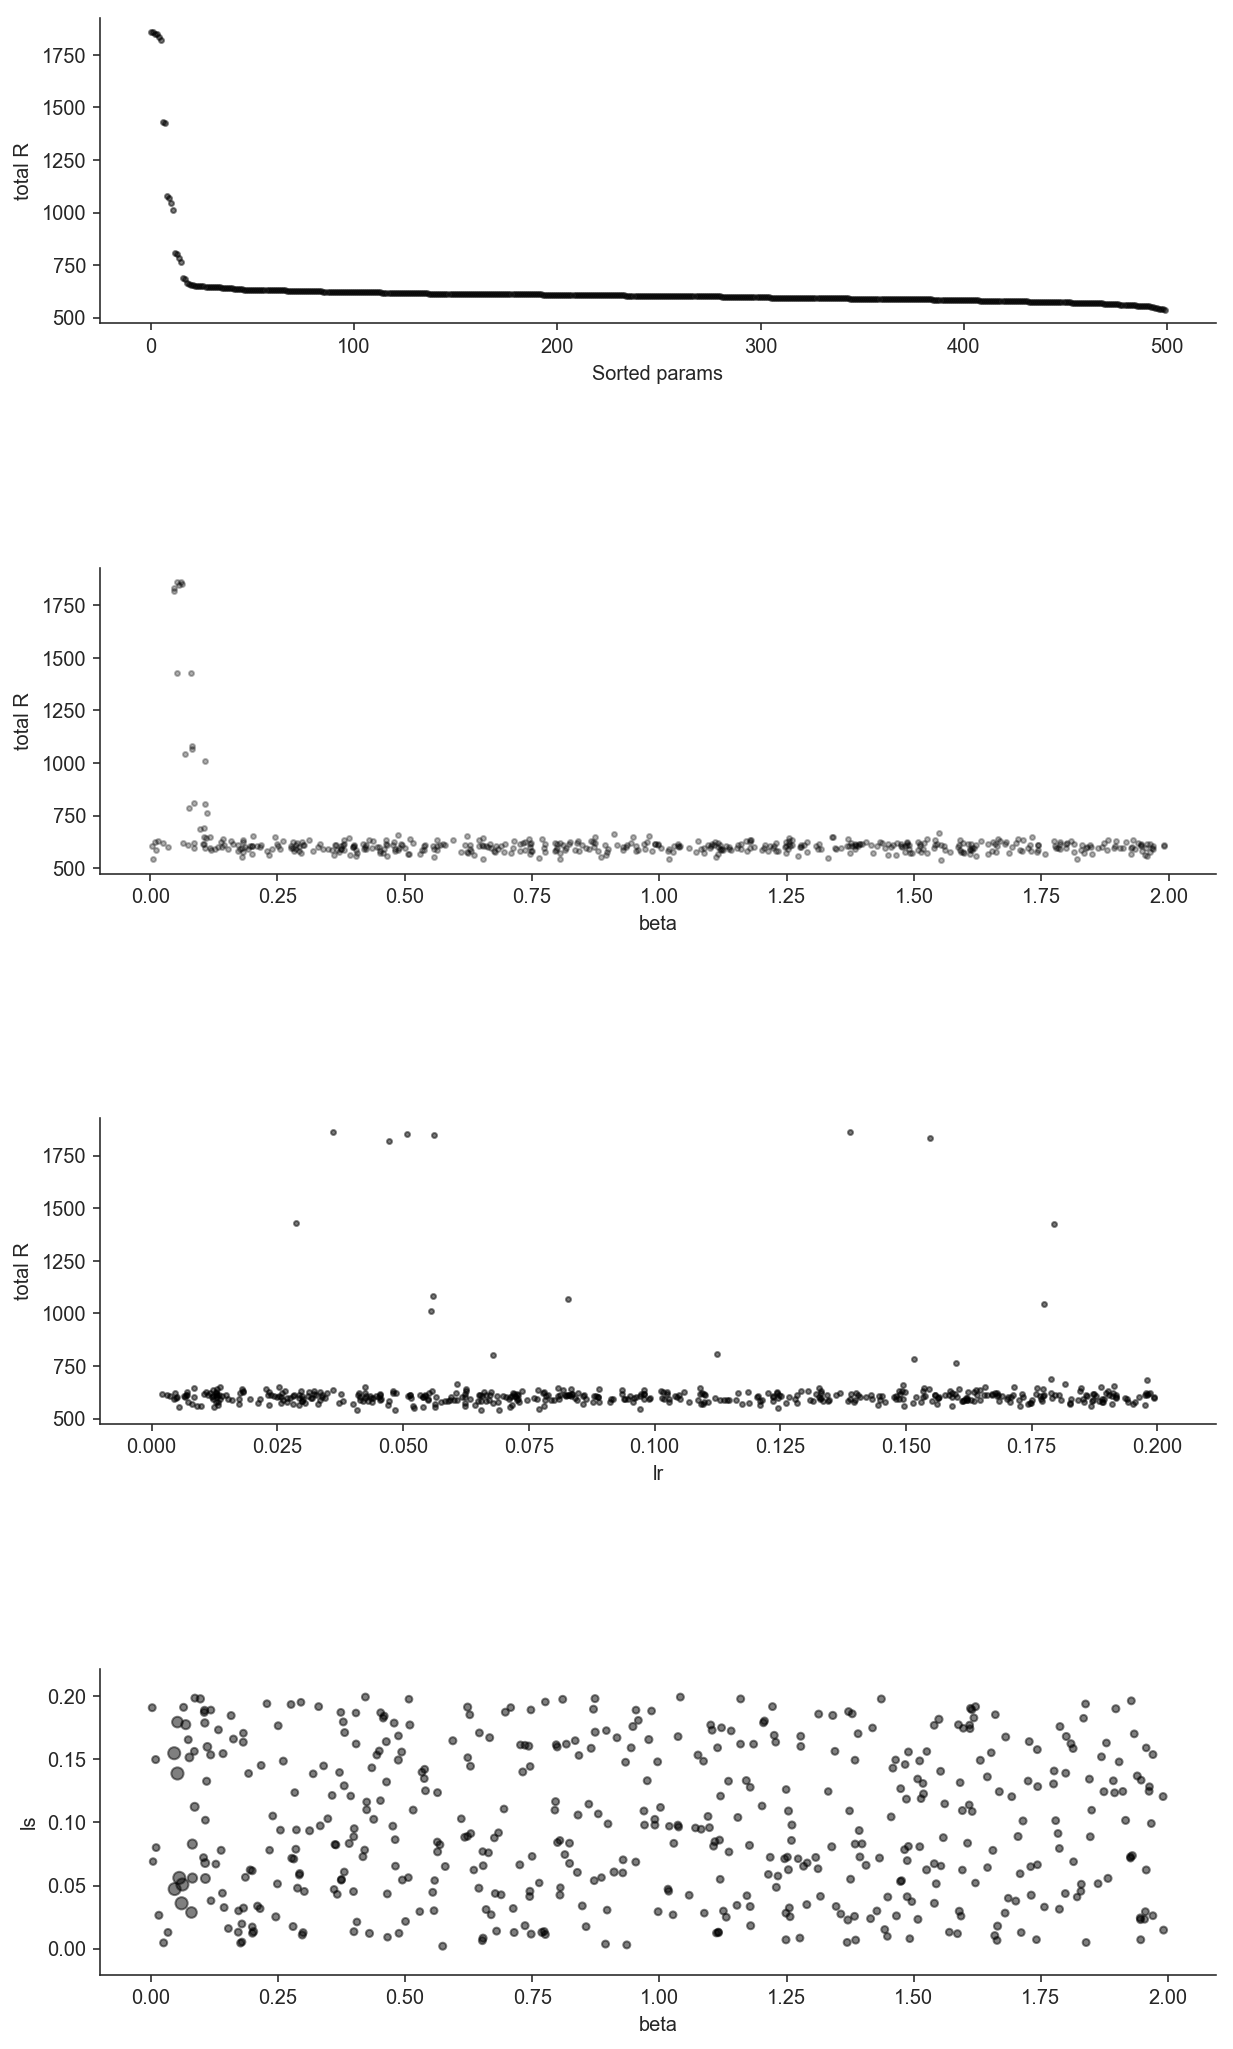

In [7]:
total_Rs = [] 
betas = []
lrs = []
trials = list(sorted_params.keys())
for t in trials:
    total_Rs.append(sorted_params[t]['total_R'])
    betas.append(sorted_params[t]['beta'])
    lrs.append(sorted_params[t]['lr'])
    
# Init plot
fig = plt.figure(figsize=(10, 18))
grid = plt.GridSpec(4, 1, wspace=0.3, hspace=0.8)

# Do plots:
# Arm
plt.subplot(grid[0, 0])
plt.scatter(trials, total_Rs, color="black", alpha=.5, s=6, label="total R")
plt.xlabel("Sorted params")
plt.ylabel("total R")
_ = sns.despine()

plt.subplot(grid[1, 0])
plt.scatter(betas, total_Rs, color="black", alpha=.3, s=6, label="total R")
plt.xlabel("beta")
plt.ylabel("total R")

_ = sns.despine()

plt.subplot(grid[2, 0])
plt.scatter(lrs, total_Rs, color="black", alpha=.5, s=6, label="total R")
plt.xlabel("lr")
plt.ylabel("total R")
_ = sns.despine()

plt.subplot(grid[3, 0])
plt.scatter(betas, lrs, color="black", alpha=.5, s=np.asarray(total_Rs)/50, label="total R")
plt.xlabel("beta")
plt.ylabel("ls")
_ = sns.despine()

# Distributions

of parameters

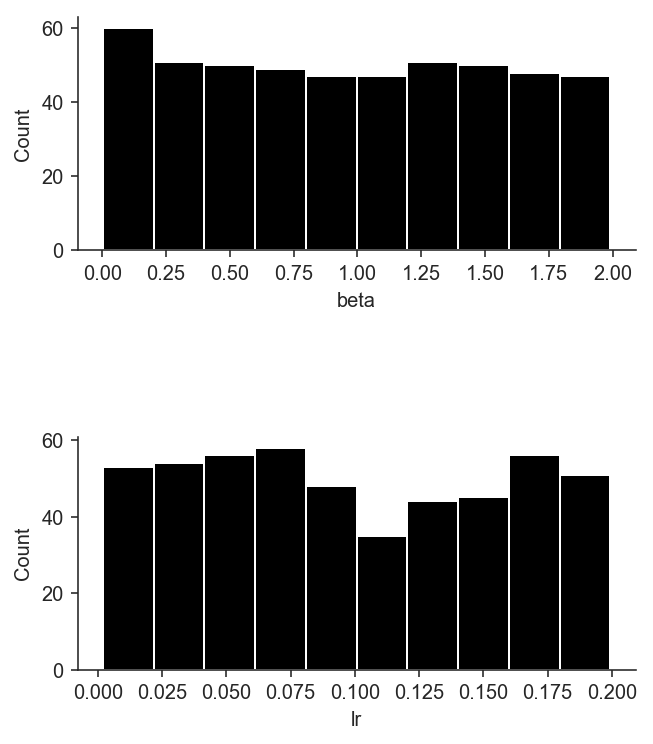

In [8]:
# Init plot
fig = plt.figure(figsize=(5, 6))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)

plt.subplot(grid[0, 0])
plt.hist(betas, color="black")
plt.xlabel("beta")
plt.ylabel("Count")
_ = sns.despine()

plt.subplot(grid[1, 0])
plt.hist(lrs, color="black")
plt.xlabel("lr")
plt.ylabel("Count")
_ = sns.despine()

of total reward

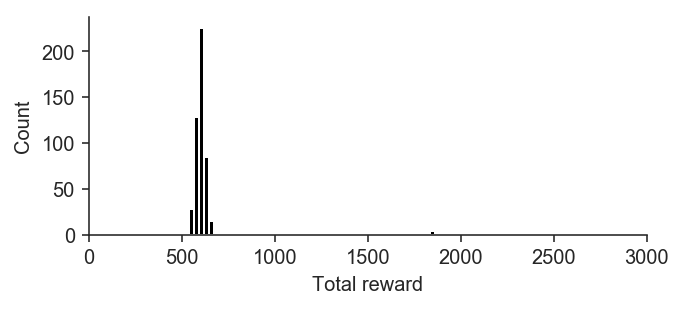

In [9]:
# Init plot
fig = plt.figure(figsize=(5, 2))
grid = plt.GridSpec(1, 1, wspace=0.3, hspace=0.8)

plt.subplot(grid[0, 0])
plt.hist(total_Rs, color="black", bins=50)
plt.xlabel("Total reward")
plt.ylabel("Count")
plt.xlim(0, 3000)
_ = sns.despine()